In [16]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from pathlib import Path
from selenium import webdriver
import datetime
from loguru import logger
import datetime
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# a logging support time difference class
class logtimediff():
    
    def __init__(self,name=None):
        self.start=datetime.datetime.now()
        self.reference={}
        if name is not None:
            self.ref(name)
#             print(name)

        
#     def diff(self):
#         name=None
#         if name is not None:
#             return datetime.datetime.now() - self.ref['name']
#         else:
#             return datetime.datetime.now() - self.start
        
    
    def ref(self,name=None):
        if name is not None:
            print(name)
            self.reference[name]=datetime.datetime.now()
        
        
a=logtimediff('mystart')
# a

mystart


In [53]:
a.start

datetime.datetime(2020, 10, 17, 10, 4, 18, 510357)

In [2]:
home_url='https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/wunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1'
home_url='https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220'
#          'https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/wunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1'
#     'https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/cozy-studio-near-schmiede-wiedikon-1405chf-month.2072688?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1

logger.info('starting scraping')
driver = webdriver.Firefox(executable_path=Path(r'C:\Users\Bo-user\Downloads\geckodriver-v0.27.0-win64') / 'geckodriver.exe')
driver.get(home_url)
previews=[]
content = driver.page_source # this is one big string of webpage html
soup = BeautifulSoup(content)
logger.info('soup made')


2020-10-18 00:12:59.449 | INFO     | __main__:<module>:6 - starting scraping
2020-10-18 00:13:11.226 | INFO     | __main__:<module>:12 - soup made


In [22]:
driver = webdriver.Firefox(executable_path=Path(r'C:\Users\Bo-user\Downloads\geckodriver-v0.27.0-win64') / 'geckodriver.exe')
driver.get(home_url)

for k in range(6):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(abs(random.gauss(1, 1))+3)
content = driver.page_source # this is one big string of webpage html
soup = BeautifulSoup(content)
logger.info('soup made')

2020-10-18 00:38:11.947 | INFO     | __main__:<module>:9 - soup made


(array([ 94.,  97., 101.,  77., 110.,  84.,  81., 103.,  97.,  86.,  86.,
         79.,  83.,  76.,  80.,  72.,  64.,  54.,  53.,  47.,  46.,  45.,
         50.,  36.,  33.,  29.,  25.,  23.,  13.,  10.,  11.,   6.,  11.,
          8.,   5.,   9.,   2.,   5.,   2.,   1.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([8.56920548e-04, 9.72203144e-02, 1.93583708e-01, 2.89947102e-01,
        3.86310496e-01, 4.82673890e-01, 5.79037284e-01, 6.75400678e-01,
        7.71764072e-01, 8.68127465e-01, 9.64490859e-01, 1.06085425e+00,
        1.15721765e+00, 1.25358104e+00, 1.34994443e+00, 1.44630783e+00,
        1.54267122e+00, 1.63903462e+00, 1.73539801e+00, 1.83176140e+00,
        1.92812480e+00, 2.02448819e+00, 2.12085159e+00, 2.21721498e+00,
        2.31357837e+00, 2.40994177e+00, 2.50630516e+00, 2.60266856e+00,
        2.69903195e+00, 2.79539534e+00, 2.89175874e+00, 2.98812213e+00,
        3.08448552e+00, 3.18084892e+00, 3.27721231e+00, 3.37357571e+00,
        3.

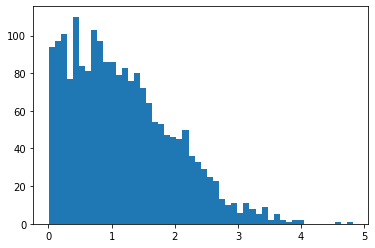

In [21]:
a=[]
for i in range(2000):
    a.append(random.gauss(1, 1))
a=np.array(a)
a=abs(a)
plt.hist(a,bins=50)

In [209]:
a=soup.find_all(attrs={'class' :'advert_short_text'})

In [221]:
text = a[0].find_all(attrs={'class' :'text_comment'})
str(text[0])[:100]

'<p class="text_comment">Ich glaube, dass zusammen einfach schöner ist als alleine. Deshalb habe ich '

In [244]:
details = a[0].find_all(attrs={'class' :'and_padding'})
details


[]

In [415]:
link='https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/wunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1'
link='https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/cozy-studio-near-schmiede-wiedikon-1405chf-month.2072688?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1' 
link='https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/15qm-zimmer-in-heller-grosser-4er-wg.2072828?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fpage%3D2%26hash%3D8066eefae06f4ebdde76511cbb811cdf'
driver.get(link)
content = driver.page_source # this is one big string of webpage html
soup = BeautifulSoup(content)


In [416]:
details = soup.find('div', attrs={'class': 'detail_block'})
details_text = html_clean_1(details.get_text())
details_text

'Biete / Suche / Tausche: Wohnung / Zimmer: Biete Mieten & Kaufen: Mieten Stadt / Agglo: Stadt Vertragsart: unbefristet Zimmer: 1Kosten: 790.00Besichtigungstermin: 24.10.2020, 16:00Adresse: Neunbrunnenstrasse , 8050 Zürich Kontakt: f**********@g********mDie vollen Kontaktinformationen sind nur für Ron Orp Leser sichtbar. Hier gleich kostenlos anmelden. \t \t\t \t\tAchtung: Überweise nie eine Kaution an Personen, deren Wohnung du nie gesehen hast oder weil sie gerade nicht in der Schweiz weilen.\t \t mehr SCHREIB MIR! Anzeige Online Crowdfunding Workshop Du möchtest ein eigenes Crowdfunding Projekt starten? Dann ist der kostenlose Online-Workshop von Crowdify genau das Richtige für dich. Mehr Infos Werbeanzeige WG Folgen ♥ ♥ ♥ Unterstütze Ron ♥ ♥ ♥Ich bin dein Sprachrohr für deine Stadt und dabei stets unabhängig. Daher freue ich mich über alle, die bereit sind, einen kleinen, finanziellen Beitrag an mein Tun zu leisten. Kommentare0 auf Merkliste'

In [446]:
regex={'category1': r'Biete \/ Suche \/ Tausche: (.+?):',
                   'bid_ask': r'Biete \/ Suche \/ Tausche: .+?: (.+?) ',
                   'rent_buy': r'Biete \/ Suche \/ Tausche: (.+?):',
                   'rooms': r'Zimmer: ([^a-zA-Z ]+)',
                   'cost': r'Kosten: ([^a-zA-Z ]+)',
                   'address': r'Adresse: (.*?)Kontakt',
                   'duration': r'Vertragsart: (.*?) ',
                   }
d={}
for k, v in regex.items():
    prop=re.search(v,details_text).groups(0)[0]
    if prop is None:
        prop = unknown
    d[k]=prop
d

{'category1': 'Wohnung / Zimmer',
 'bid_ask': 'Biete',
 'rent_buy': 'Wohnung / Zimmer',
 'rooms': '1',
 'cost': '790.00',
 'address': 'Neunbrunnenstrasse , 8050 Zürich ',
 'duration': 'unbefristet'}

In [425]:
search = re.search(r'(Biete \/ Suche \/ Tausche:) (.+?): (.+?) ',details_text)
for group in search.groups(0):
    print(group)

Biete / Suche / Tausche:
Wohnung / Zimmer
Biete


In [426]:
search = re.search(r'Biete \/ Suche \/ Tausche: (.+?):',details_text)
for group in search.groups(0):
    print(group)



Wohnung / Zimmer


In [427]:
search = re.search(r'Biete \/ Suche \/ Tausche: .+?: (.+?) ',details_text)
for group in search.groups(0):
    print(group)



Biete


In [418]:
search = re.search(r'Mieten \& Kaufen: (.+?) ',details_text)
for group in search.groups(0):
    print(group)

Mieten


In [419]:
search = re.search(r'Stadt \/ Agglo: (.+?) ',details_text)
for group in search.groups(0):
    print(group)

Stadt


In [420]:
search = re.search(r'Zimmer: ([^a-zA-Z ]+)',details_text)
for group in search.groups(0):
    print(group)

1


In [421]:
search = re.search(r'Kosten: ([^a-zA-Z ]+)',details_text)
for group in search.groups(0):
    print(group)

790.00


In [422]:
search = re.search(r'Adresse: (.*?)Kontakt',details_text)
for group in search.groups(0):
    print(group)

Neunbrunnenstrasse , 8050 Zürich 


In [424]:
search = re.search(r'Vertragsart: (.*?) ',details_text)
for group in search.groups(0):
    print(group)

unbefristet


In [270]:
soup.find('div',attrs={'class' :'pull-left'}).string

'02.09.2020 10:53'

In [272]:
import dateparser
dateparser.parse(soup.find('div',attrs={'class' :'pull-left'}).string)

datetime.datetime(2020, 2, 9, 10, 53)

In [310]:
# text_comment 
re.sub(r'\n','',soup.find('p',attrs={'class' :'text_comment'}).get_text()).strip()

'Ich glaube, dass zusammen einfach schöner ist als alleine. Deshalb habe ich ein Start-up gegründet, das Gebäude für grosse Hausgemeinschaften baut.In Kloten eröffnen wir nun am 1.Oktober unser erstes Gebäude mit 38 Suiten, komplett mit jeweils eigenem Bad (Dusche & WC). Die meisten Suiten haben einen eigenen Balkon, sind grosszügig gebaut und schallisoliert. Wir teilen uns die zwei grossen Gemeinschaftsräume mit Grossküche, Terrasse, Lounge und Essbereich.Die Zimmer sind möbliert, damit du alles hast, was du brauchst aber auch eigene Sachen einbringen kannst.Jedes der zwei Stockwerke hat einen eigenen Waschraum mit je zwei Waschmaschinen und Trockner.Im Erdgeschoss gibt es zwei Restaurants, die für uns zu vergünstigten Preisen kochen.Der Bahnhof mit der S-Bahn ist nur 3 Gehminuten entfernt und mit der S7 ist man in 15min am HB.Mindestens einmal pro Wochen essen wir gemeinsam, daneben organisieren wir verschiedene Aktivitäten je nach Lust und Laune.Die Zimmerpreise starten bei CHF 1095

In [312]:
details =soup.find('div',attrs={'class' :'detail_block'})

In [309]:
re.sub(' +',' ',re.sub(r'\n','',details.contents[1].span.get_text())).strip()

'Biete / Suche / Tausche: Wohnung / Zimmer: Biete'

In [356]:
details.contents[3].span.contents


['\n',
 <div>
                                 Mieten &amp; Kaufen:
                                                                     Mieten
                                                                                             </div>,
 '\n                                                                            Stadt / Agglo:\n                                                         Agglo                            ',
 <br/>,
 '\n',
 <div>
                                     Vertragsart:
                                                                                                     unbefristet
                                                                 </div>,
 '\n']

In [367]:
details.contents[5].span.div.get_text()



"\n                            Zimmer: 1Kosten: 1'095.00Adresse: Marktgasse 19, 8038 Kloten\n                            "

In [374]:
d={}
s=details.contents[5].span.div.get_text()
for separator in ['Kosten','Adresse']:
    s=re.sub(separator,';'+separator,s)
d['rooms'], d['cost'], d['adress'] = s.split(';')   

In [375]:
d

{'rooms': '\n                            Zimmer: 1',
 'cost': "Kosten: 1'095.00",
 'adress': 'Adresse: Marktgasse 19, 8038 Kloten\n                            '}

In [346]:
def html_clean_1(s):
    # a specific cleaner for (ronorp) html strings
    s = re.sub(r'\n','',s) # remove newlines
    s = re.sub(' +',' ', s) # rmove excessive space
    s=s.strip()
    return s
    

In [387]:
soup.find(attrs={'class': 'user_info'}).find('div',attrs={'class': 'name'})['title']

'johannespeter'

In [382]:
soup.find(attrs={'class': 'user_info'}).contents
       

['\n',
 <div class="avatar" data-actions="click" data-category="ContentDetails" data-label="ProfileImage" data-trace="">
 <a data-disable-transition="1" href="https://www.ronorp.net/zuerich/ronsters-1/vorschau/johannespeter?&amp;back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%2Fwunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131%3F%26back_url%3D%252Fzuerich%252Fimmobilien%252Fwg-zuerich.1220%253Fs%253D1" style="box-shadow: none;">
 <img alt="johannespeter" class="avatar profile-190156" data-size="content" height="40" src="https://static4.ronorp.net/media/userpics/photo-190000-191000/photo_190156_40.jpg?1596384071" title="johannespeter" width="40"/>
 </a> </div>,
 '\n',
 <div class="user">
 <div class="name" title="johannespeter">
 <a data-actions="click" data-category="ContentDetails" data-label="ProfileName" data-line="141" data-trace="" href="https://www.ronorp.net/zuerich/ronsters-1/vorschau/johannespeter?&amp;back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%2Fwunders

In [164]:
for element in soup.findAll(attrs={'class': 'ronorp-inserate'}):
    mything= element.a
    print(mything['alt'])


Wunderschönes Co-Living Haus mit 38 Suiten in Kloten,...


KeyError: 'alt'

In [182]:
results={}
for element in soup.find_all(attrs={'class': 'title_comment colored'}):
    try:
        results.update({element.a['alt']:element.a.attrs})
        
    except KeyError:
        print('ad')
        

ad


In [191]:
df=pd.DataFrame(results).transpose()
pd.options.display.max_colwidth = 200
df

,data-advert-position,class,href,data-attr-href,alt,data-trace,data-category,data-label,data-actions
"Wunderschönes Co-Living Haus mit 38 Suiten in Kloten,...",2042131_1220_af42a93dbd7b5ed6920a146aa514ac00,[],https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/wunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1,https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/wunderschoenes-co-living-haus-mit-38-suiten-in-kloten.2042131?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1,"Wunderschönes Co-Living Haus mit 38 Suiten in Kloten,...",,ContentList,ContentTitle,click
Super zentrales WG-Zimmer oberhalb GZ Wipkingen,2072274_1220_e7949bfbebb65f4c72647ddb2a5199df,[],https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/super-zentrales-wg-zimmer-oberhalb-gz-wipkingen.2072274?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1,https://www.ronorp.net/zuerich/immobilien/wg-zuerich.1220/super-zentrales-wg-zimmer-oberhalb-gz-wipkingen.2072274?&back_url=%2Fzuerich%2Fimmobilien%2Fwg-zuerich.1220%3Fs%3D1,Super zentrales WG-Zimmer oberhalb GZ Wipkingen,,ContentList,ContentTitle,click


In [199]:
from urllib.parse import urlparse

domain = urlparse(home_url).netloc
print(domain) # --> www.example.test


www.ronorp.net


In [193]:
from urllib.parse import urlparse

In [197]:
a=urlparse(home_url).netloc.replace('www.','')
a

'ronorp.net'

In [198]:
pos = a.rfind('.') # find rightmost dot
if pos >= 0:         # found one
    url = a[:pos]
url

'ronorp'